![mobydick](mobydick.jpg)

In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

What are the most frequent words in Herman Melville's novel Moby Dick, and how often do they occur?
Note that the HTML file you are asked to request is a cashed version of this file from Project Gutenberg.
Your project will follow these steps:
- The first step will be to request the Moby Dick HTML file using requests and encoding it to utf-8. Here is the URL to scrape from: https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm
- Next, you'll extract the HTML and create a BeautifulSoup object using an HTML parser to get the text.
- Following that, you'll initialize a regex tokenizer object tokenizer using nltk.tokenize.RegexpTokenizer to keep only alphanumeric text, assigning the results to tokens.
- You'll transform the tokens into lowercase, removing English stop words, and saving the results to words_no_stop.
- Finally, you'll initialize a Counter object and find the ten most common words, saving the result to top_ten and printing to see what they are.

In [1]:
# Import and download packages
import requests # type: ignore
from bs4 import BeautifulSoup # type: ignore
import nltk # type: ignore
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')
r.encoding = 'utf-8'
r

<Response [200]>

In [3]:
# Extract the text from the response object and assign it to html
html = r.text

# Print out the first 2000 characters in html
html[:2000]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

In [5]:
html_soup = BeautifulSoup(r.content, 'html.parser')
moby_text = html_soup.get_text()


In [6]:
from nltk.tokenize import RegexpTokenizer

# Initialize the tokenizer with a regular expression that keeps only alphanumeric text
tokenizer = RegexpTokenizer(r'\w+')

# Tokenize the text to split it into individual words
tokens = tokenizer.tokenize(moby_text)
#tokens

In [7]:
words = [w.lower() for w in tokens]
#words

In [8]:
stop_words = nltk.corpus.stopwords.words("english")
stop_words[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

In [9]:
words_no_stop = [wns for wns in words if wns not in stop_words]

words_no_stop[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

In [10]:
count = Counter(words_no_stop)
#count

top_ten = count.most_common(10)
top_ten

[('whale', 1246),
 ('one', 925),
 ('like', 647),
 ('upon', 568),
 ('man', 527),
 ('ship', 519),
 ('ahab', 517),
 ('ye', 473),
 ('sea', 455),
 ('old', 452)]

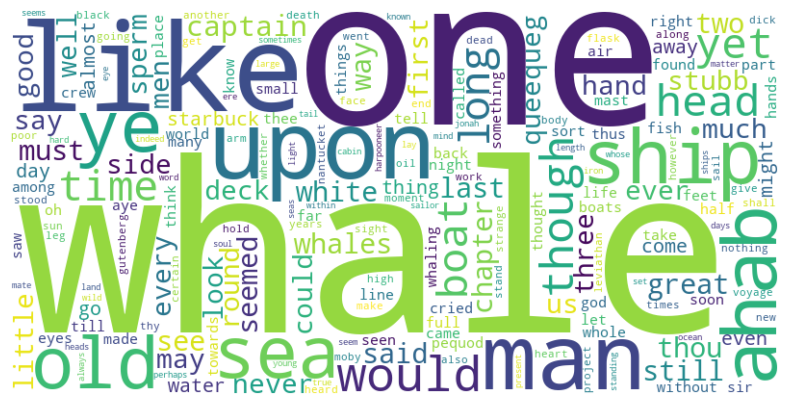

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep the image clean
plt.show()